In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.shape

(891, 12)

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [87]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataset contains three types of data(int64,float64,object)data.

In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values are present in (Age,Cabin,Embarked) columns

<Axes: >

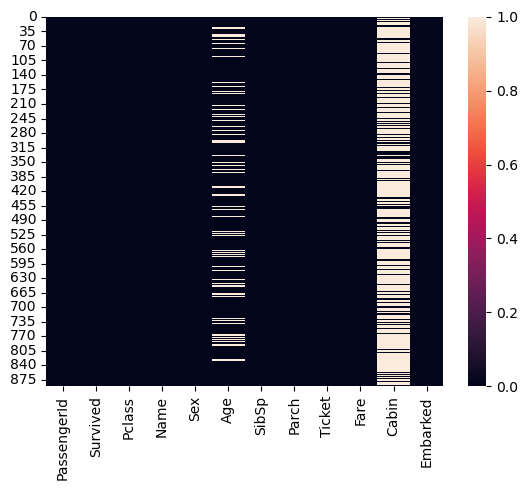

In [90]:
sns.heatmap(df.isnull())

We can clearly visualize that there are null values are present

Handling with missing values

In [91]:
df1=df.drop(columns='Cabin',axis=1)

In [92]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [93]:
#replacing the missing values in 'Age' column
df1['Age'].fillna(df['Age'].mean(),inplace=True)

In [94]:
df1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [95]:
#replacing the missing values im ;Embarked with mode
df1['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [96]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [97]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

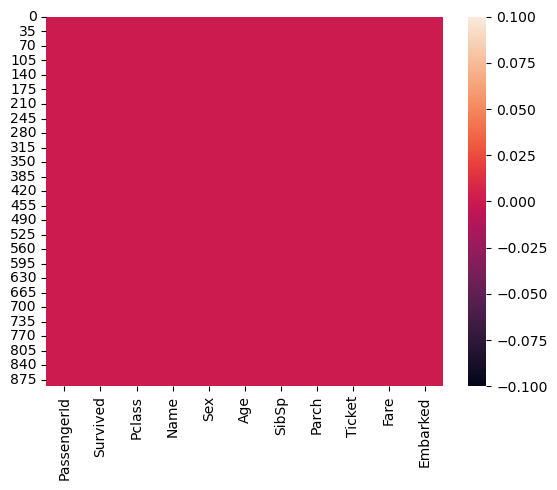

In [98]:
sns.heatmap(df1.isnull())

In [99]:
#checking for value counts
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000    

In [100]:
df1.duplicated().sum() #no duplicates are present

0

# Statistical summary of data

In [101]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.This gives the statistical summary of numerical columns.The summary of the dataset looks perfect since there is no negative or invalid values are present.
2.In this dataset count of all columns are same,which means there is no missing values are present.
3.The median(50%) is slightly greater than mean which means skewness is present.
4.By summarizing the data there is less diff between 75% and max Which means outliers are present.


In [102]:
# finding the no.of people survived and not survived
df1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Visualization

Survived
0    549
1    342
Name: count, dtype: int64


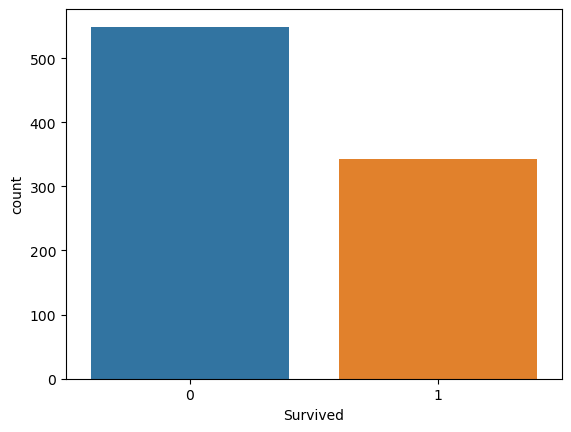

In [103]:

ax=sns.countplot(x='Survived',data=df1)
print(df1['Survived'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


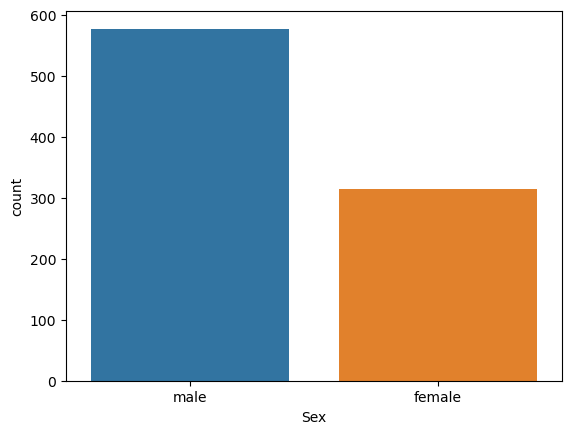

In [104]:
ax=sns.countplot(x='Sex',data=df1)
print(df1['Sex'].value_counts())

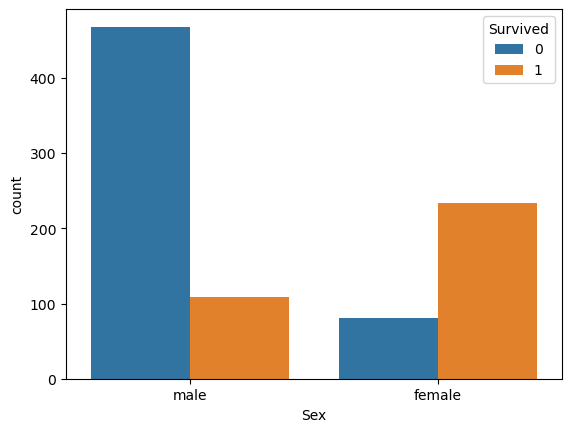

In [105]:
ax=sns.countplot(x='Sex',hue='Survived',data=df1)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


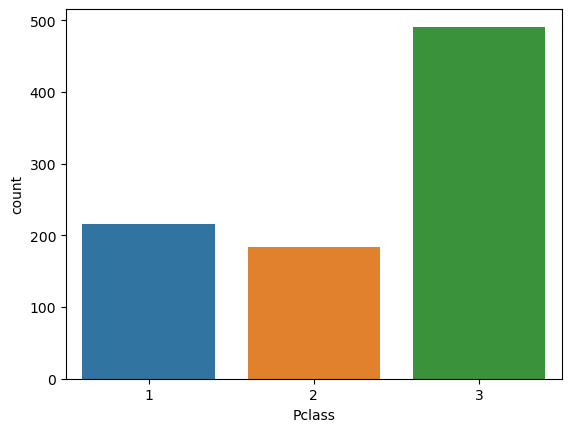

In [106]:
ax=sns.countplot(x='Pclass',data=df1)
print(df1['Pclass'].value_counts())

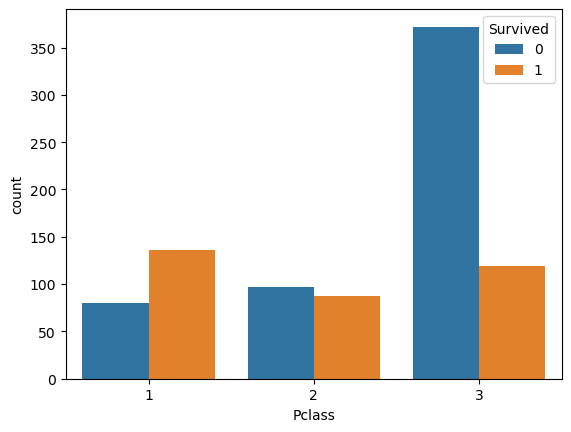

In [107]:
ax=sns.countplot(x='Pclass',hue='Survived',data=df1)


Encoding the categorical columns

In [108]:
df1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [109]:
df1['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [110]:
df1.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [111]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [112]:
df1.shape

(891, 11)

In [139]:
df2=df1.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [140]:
df2.shape

(891, 8)

In [141]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


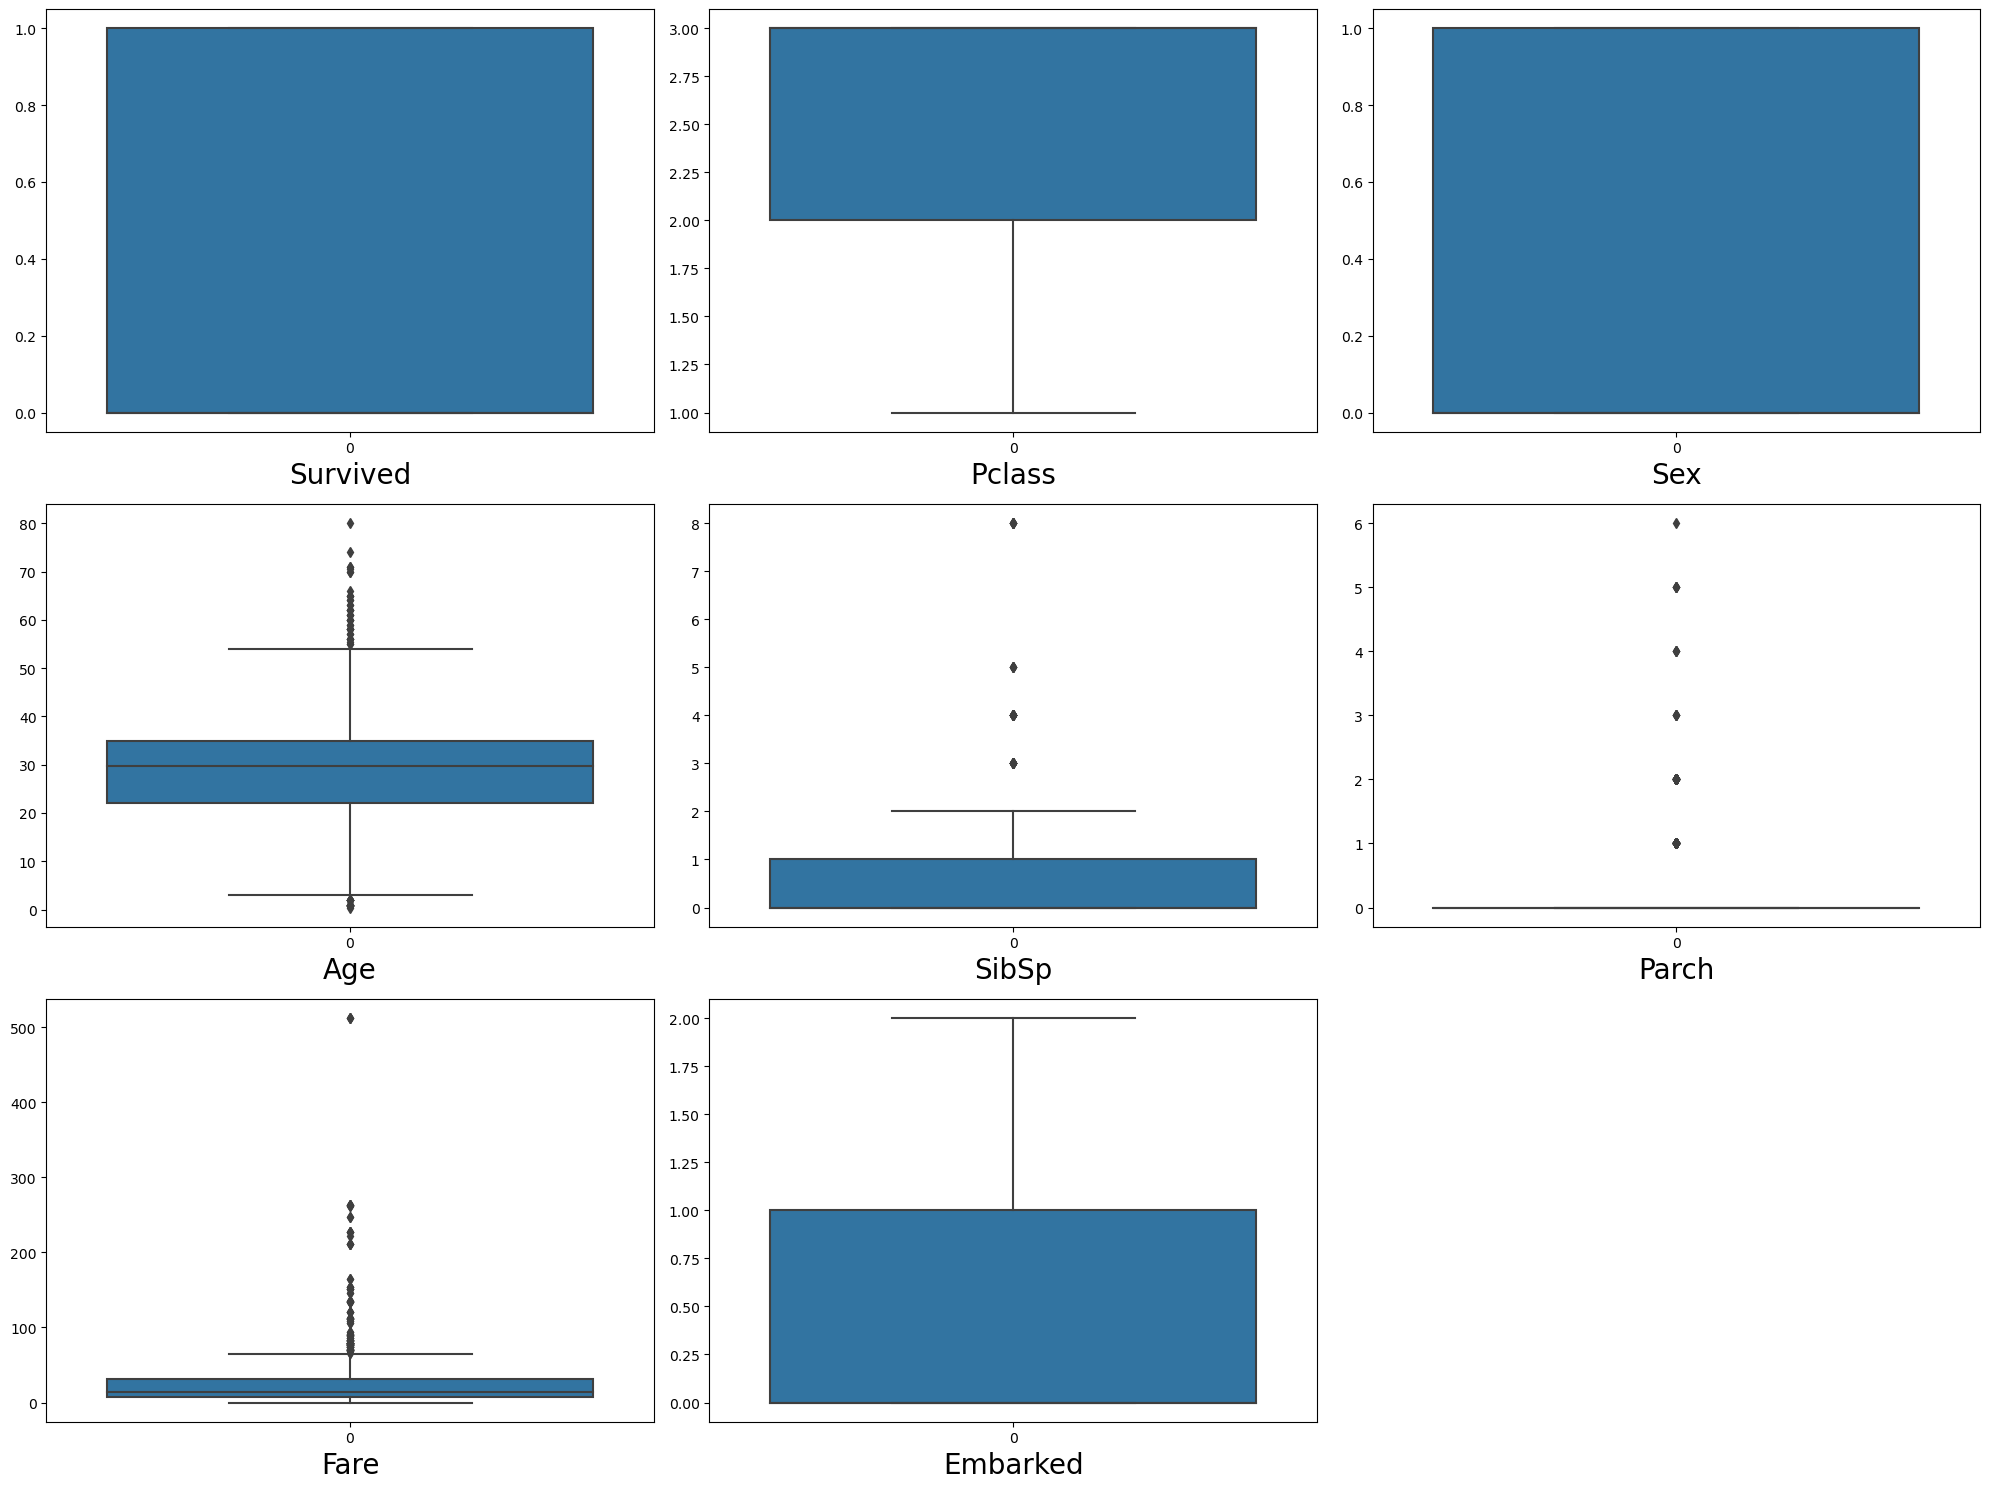

In [142]:
plt.figure(figsize=(20,15))
graph=1
for column in df2:
    if graph<9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(df2[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()

# by visualizing box plot outliers are present 

In [143]:
from scipy.stats import zscore
out_features=df2[['Age','Fare','SibSp','Parch']]
z=np.abs(zscore(out_features))
z

,Age,Fare,SibSp,Parch
0,0.592481,0.502445,0.432793,0.473674
1,0.638789,0.786845,0.432793,0.473674
2,0.284663,0.488854,0.474545,0.473674
3,0.407926,0.420730,0.432793,0.473674
4,0.407926,0.486337,0.474545,0.473674
...,...,...,...,...
886,0.207709,0.386671,0.474545,0.473674
887,0.823344,0.044381,0.474545,0.473674
888,0.000000,0.176263,0.432793,2.008933
889,0.284663,0.044381,0.474545,0.473674


In [144]:
#thresold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([3, 2, 3, 1, 2, 2, 2, 2, 3, 1, 0, 0, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 0, 1, 2, 2, 1, 3,
        3, 0, 3, 0, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 3, 1, 2, 2, 2, 2,
        2, 2, 0, 3, 2, 3], dtype=int64))

In [145]:
df2=df1[(z<3).all(axis=1)]
df2.shape

(820, 11)

In [146]:
print("old df",df1.shape)
print("new df",df2.shape)

old df (891, 11)
new df (820, 11)


In [147]:
print("Data loss percentage-",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage- 7.968574635241302


In [150]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [152]:
df2=df1.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [153]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [154]:
df2.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [157]:

df2['Fare']=np.cbrt(df2['Fare'])
df2['SibSp']=np.cbrt(df2['SibSp'])
df2['Embarked']=np.cbrt(df2['Embarked'])

In [158]:
df2.skew()

Survived    0.478523
Pclass     -0.776838
Sex         0.618921
Age         0.434488
SibSp       0.805580
Parch       2.749117
Fare       -2.950107
Embarked    1.015865
dtype: float64

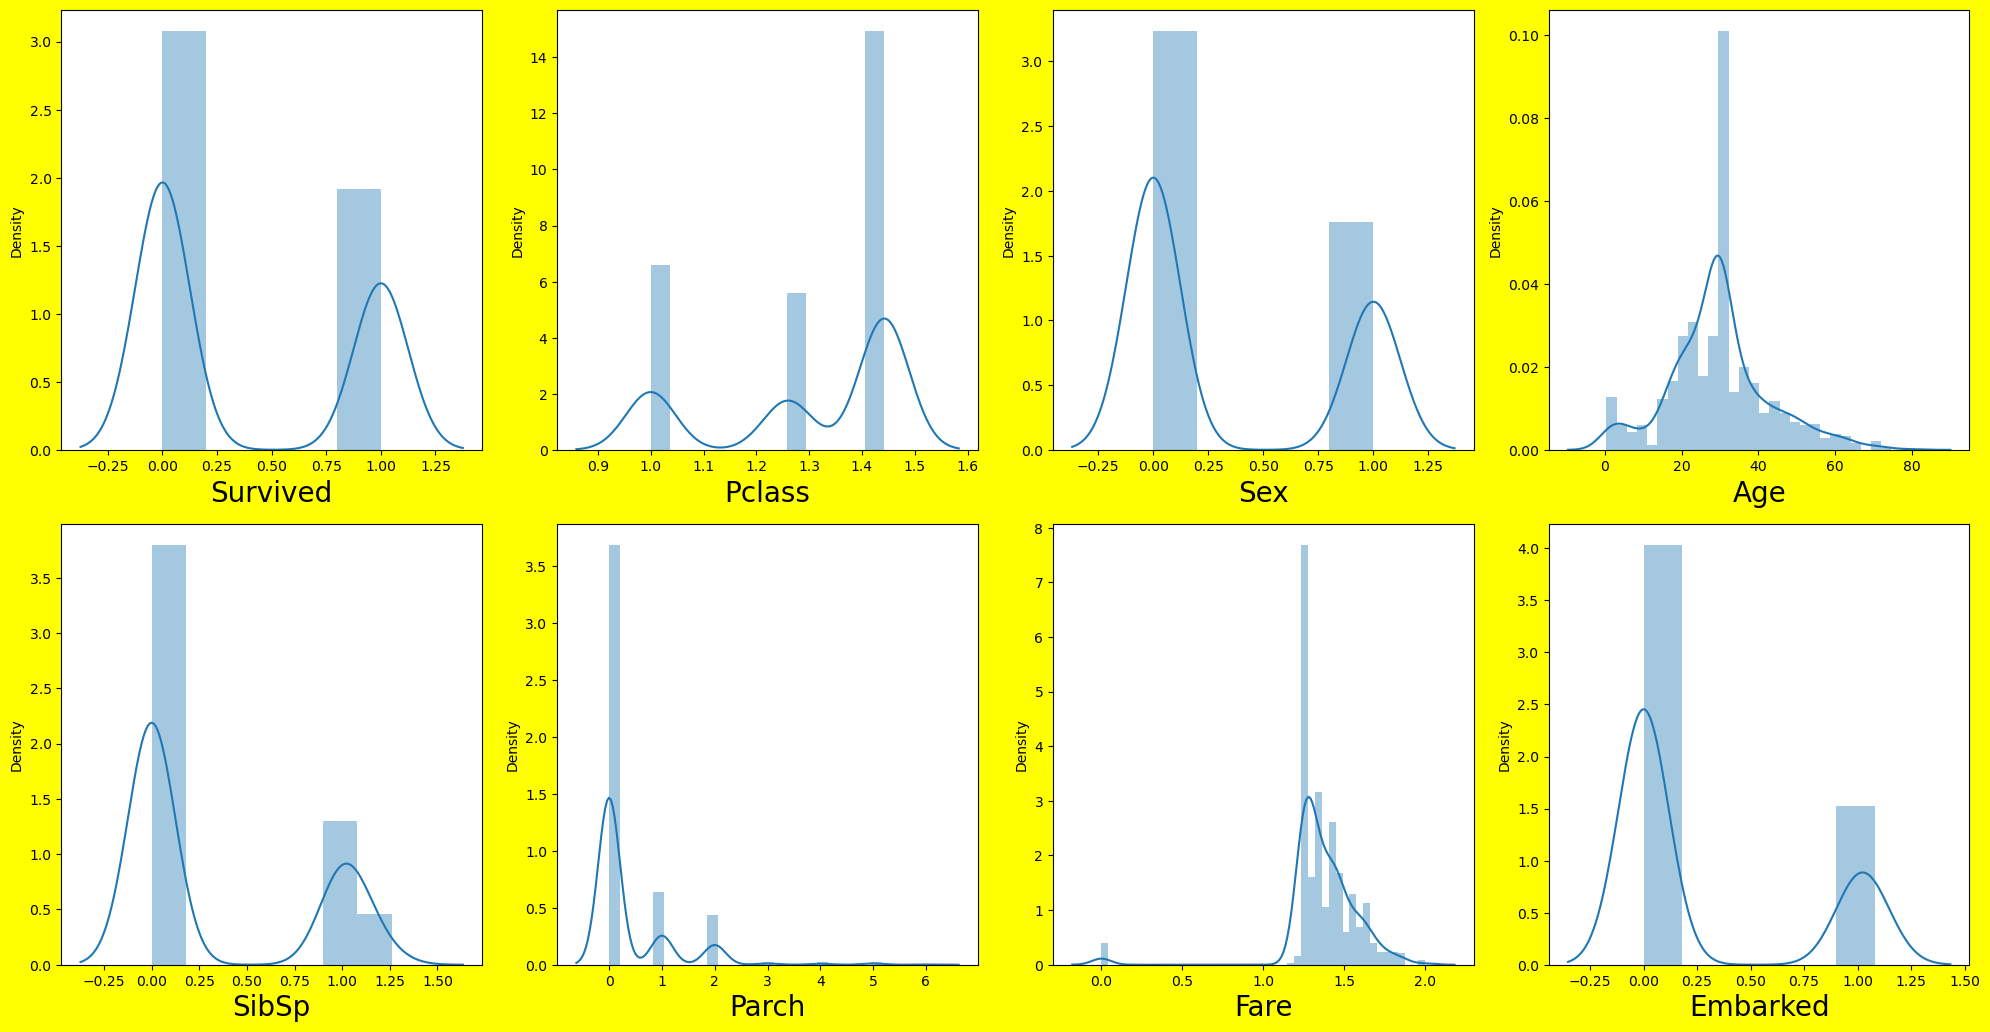

In [159]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df2:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        plt.tight_layout()

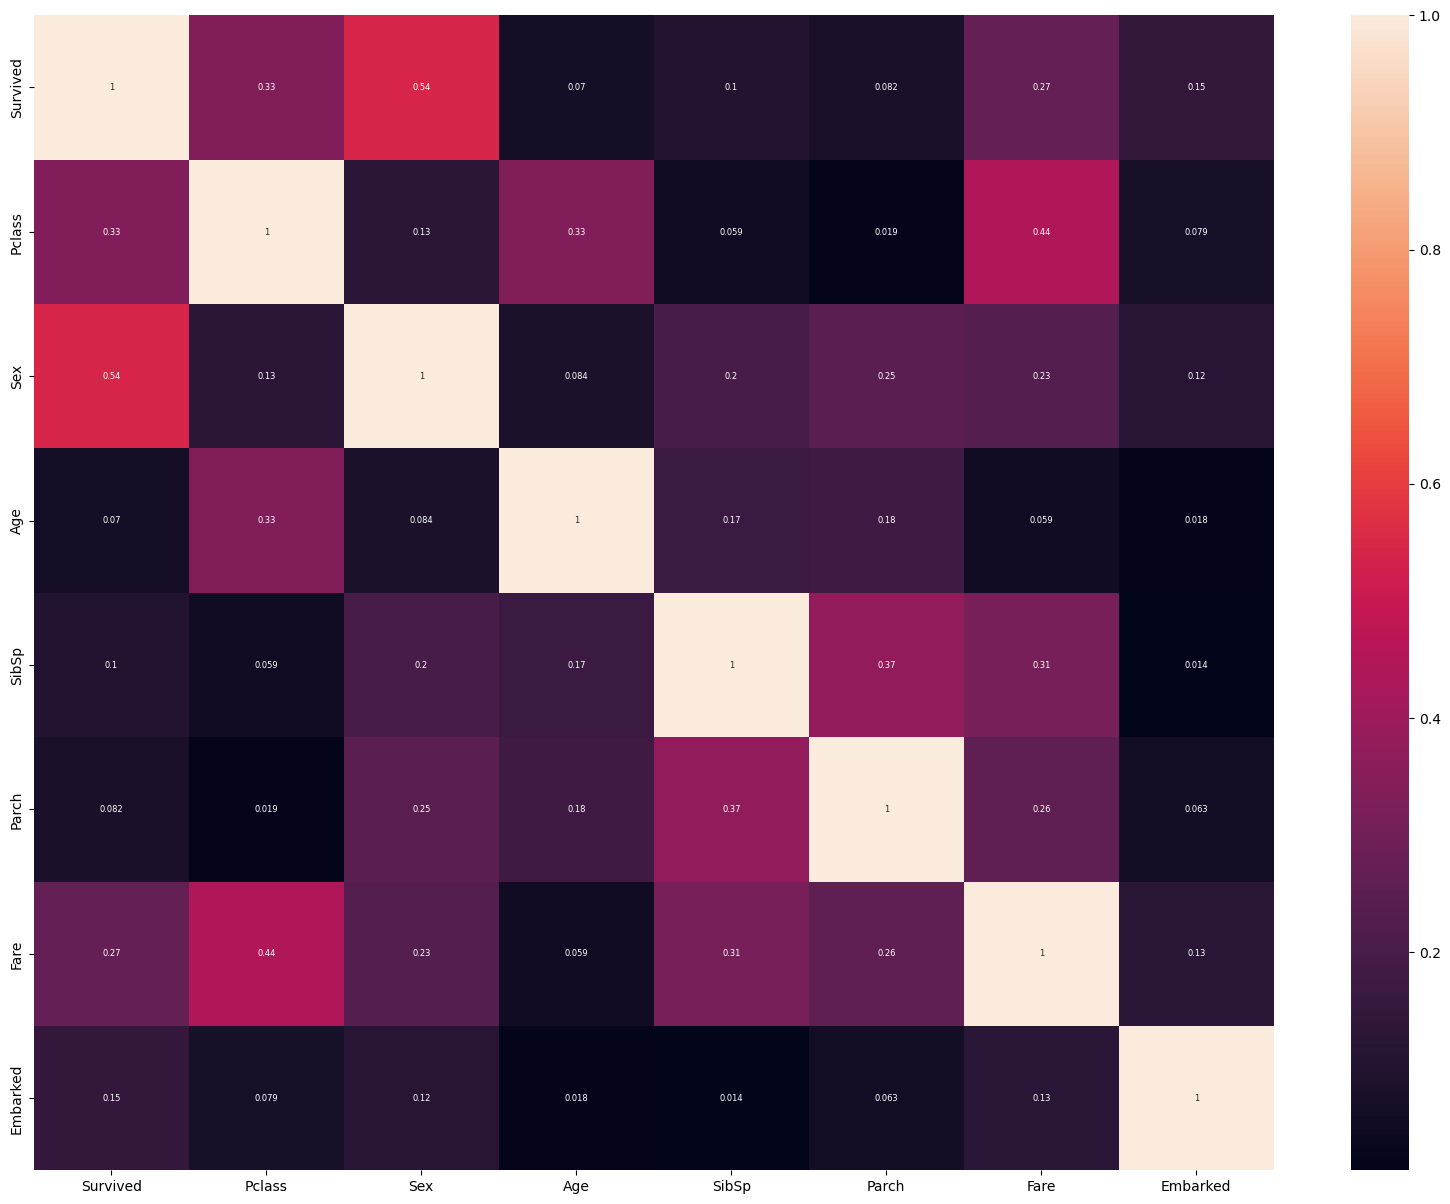

In [160]:
df2_corr=df2.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df2_corr,annot=True,annot_kws={'size':6})
plt.show()

In [161]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

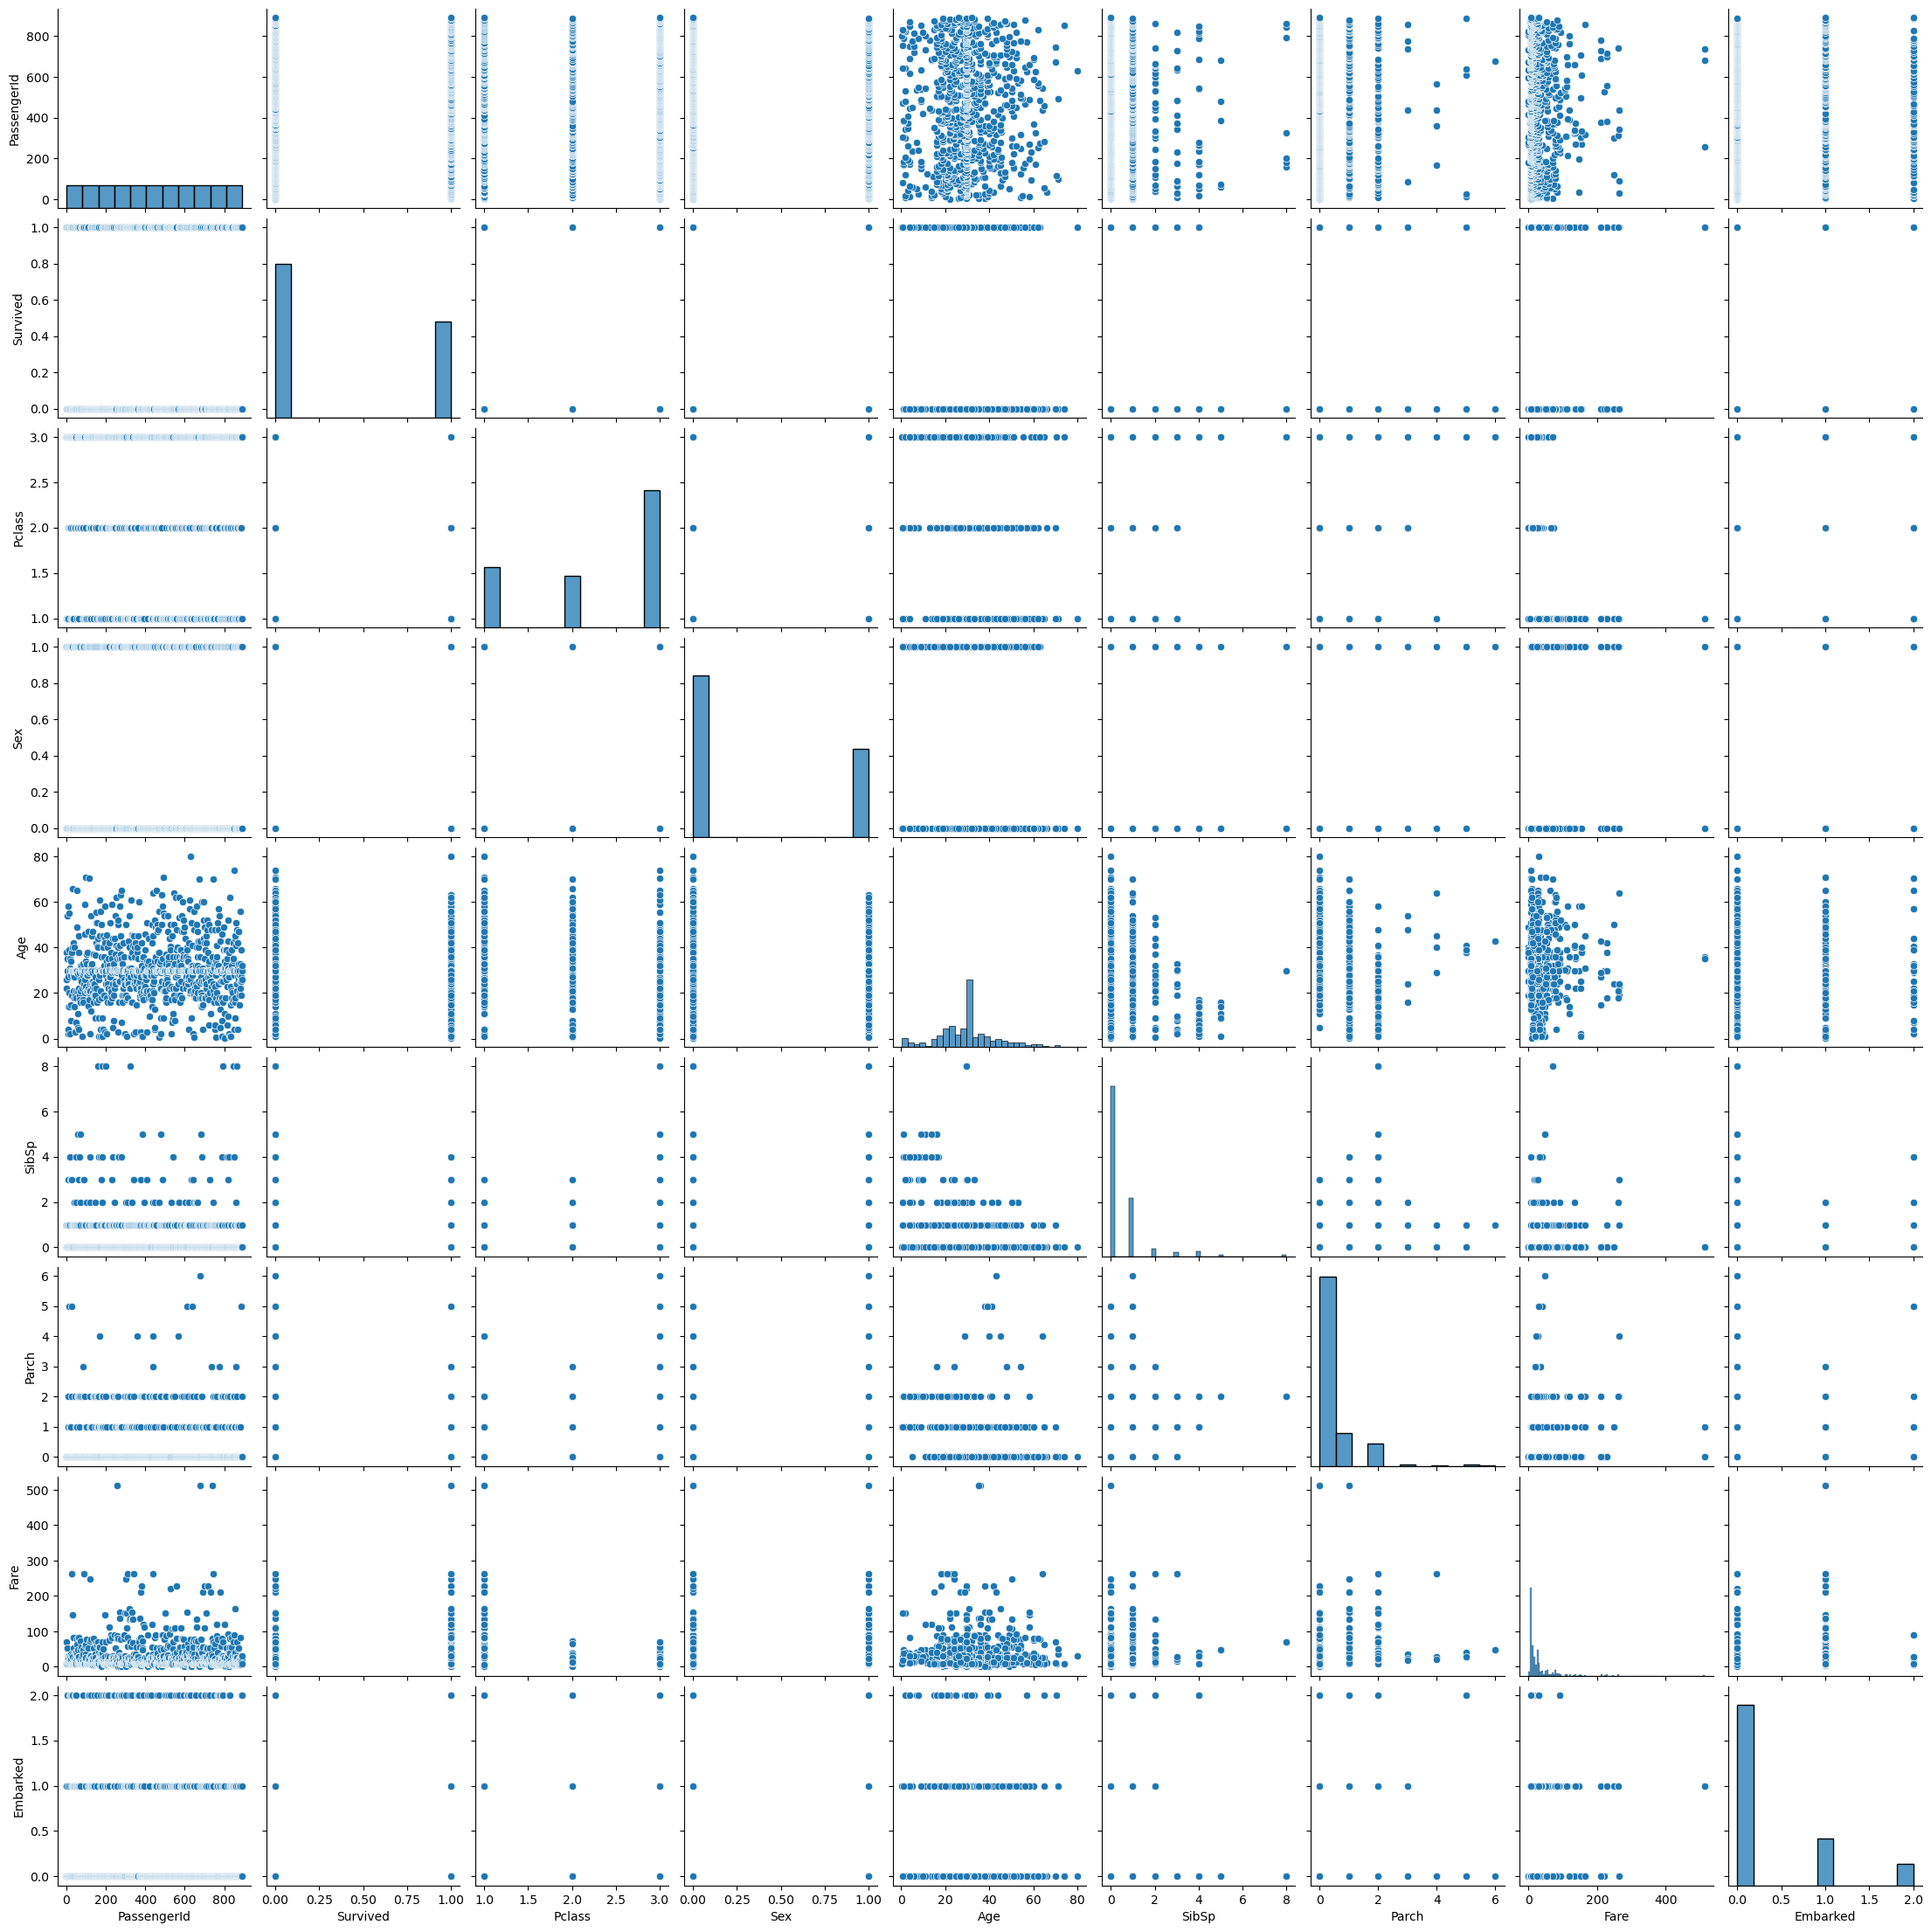

In [162]:
sns.pairplot(data=df1,palette="Dark2")
plt.show()

Seperating Features and labed

In [163]:
x=df2.drop('Survived',axis=1)
y=df2['Survived']

In [164]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.442250,0,22.000000,1.0,0,1.246215,0.00000
1,1.000000,1,38.000000,1.0,0,1.606525,1.00000
2,1.442250,1,26.000000,0.0,0,1.258603,0.00000
3,1.000000,1,35.000000,1.0,0,1.554809,0.00000
4,1.442250,0,35.000000,0.0,0,1.260794,0.00000
...,...,...,...,...,...,...,...
886,1.259921,0,27.000000,0.0,0,1.329755,0.00000
887,1.000000,1,19.000000,0.0,0,1.459233,0.00000
888,1.442250,1,29.699118,1.0,2,1.419836,0.00000
889,1.000000,0,26.000000,0.0,0,1.459233,1.00000


In [165]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Seperating independent variables

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.793926,-0.737695,-5.924806e-01,1.387437,-0.473674,-0.532979,-0.615281
1,-1.629810,1.355574,6.387890e-01,1.387437,-0.473674,1.004252,1.567413
2,0.793926,1.355574,-2.846632e-01,-0.680195,-0.473674,-0.480128,-0.615281
3,-1.629810,1.355574,4.079260e-01,1.387437,-0.473674,0.783611,-0.615281
4,0.793926,-0.737695,4.079260e-01,-0.680195,-0.473674,-0.470783,-0.615281
...,...,...,...,...,...,...,...
886,-0.205320,-0.737695,-2.077088e-01,-0.680195,-0.473674,-0.176567,-0.615281
887,-1.629810,1.355574,-8.233437e-01,-0.680195,-0.473674,0.375842,-0.615281
888,0.793926,1.355574,-2.232906e-16,1.387437,2.008933,0.207757,-0.615281
889,-1.629810,-0.737695,-2.846632e-01,-0.680195,-0.473674,0.375842,1.567413


# VIF

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.436107,Pclass
1,1.133744,Sex
2,1.197085,Age
3,1.266697,SibSp
4,1.276484,Parch
5,1.484196,Fare
6,1.041859,Embarked


# Finding best Random state

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.7761194029850746 at random state 1
Best accuracy is 0.8208955223880597 at random state 2
Best accuracy is 0.8283582089552238 at random state 4
Best accuracy is 0.832089552238806 at random state 6
Best accuracy is 0.8470149253731343 at random state 19
Best accuracy is 0.8507462686567164 at random state 132
Best accuracy is 0.8619402985074627 at random state 174


# Classification algorithms

In [170]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [171]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7985074626865671
[[145  19]
 [ 35  69]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       164
           1       0.78      0.66      0.72       104

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [172]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7686567164179104
[[139  25]
 [ 37  67]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.73      0.64      0.68       104

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [173]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7873134328358209
[[136  28]
 [ 29  75]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       164
           1       0.73      0.72      0.72       104

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [174]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8097014925373134
[[152  12]
 [ 39  65]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       164
           1       0.84      0.62      0.72       104

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [175]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada))
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

0.7910447761194029
[[142  22]
 [ 34  70]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       164
           1       0.76      0.67      0.71       104

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [186]:
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
print(accuracy_score(y_test,predgd))
print(confusion_matrix(y_test,predgd))
print(classification_report(y_test,predgd))

0.8022388059701493
[[153  11]
 [ 42  62]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       164
           1       0.85      0.60      0.70       104

    accuracy                           0.80       268
   macro avg       0.82      0.76      0.78       268
weighted avg       0.81      0.80      0.79       268



In [176]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7835820895522388
[[141  23]
 [ 35  69]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       164
           1       0.75      0.66      0.70       104

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



# Cross validation

In [177]:
#cross validation of Random Forest
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.8125980792166217
Diff between acc_score and cross validation- -0.014090616530054612


In [178]:
score=cross_val_score(ET,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predET)-score.mean())

score
0.7968740192078337
Diff between acc_score and cross validation- -0.028217302789923293


In [180]:
score=cross_val_score(LR,x,y)
print("score")
print(score.mean()*100)
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score.mean())

score
78.78852551628898
Diff between acc_score and cross validation- -0.0005718223270689826


In [185]:
score=cross_val_score(ada,x,y)
print("score")
print(score.mean()*100)
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predada)-score.mean())

score
80.70177641077144
Diff between acc_score and cross validation- -0.015972987988311482


In [183]:
score=cross_val_score(BC,x,y)
print("score")
print(score.mean()*100)
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predBC)-score.mean())

score
80.58565061829137
Diff between acc_score and cross validation- -0.022274416630674865


In [187]:
score=cross_val_score(gd,x,y)
print("score")
print(score.mean()*100)
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predgd)-score.mean())

score
82.15742891218379
Diff between acc_score and cross validation- -0.01933548315168865


# Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }


In [205]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
             'random_state':[10,50,1200],
             'max_depth':[10,15],
            'n_jobs':[-2,-1,1],
        
           'n_estimators':[50,100,200,300]}

In [206]:
gCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [207]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1200]})

In [208]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [209]:
Final_model=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100,random_state=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.59701492537313


Roc Auc curve

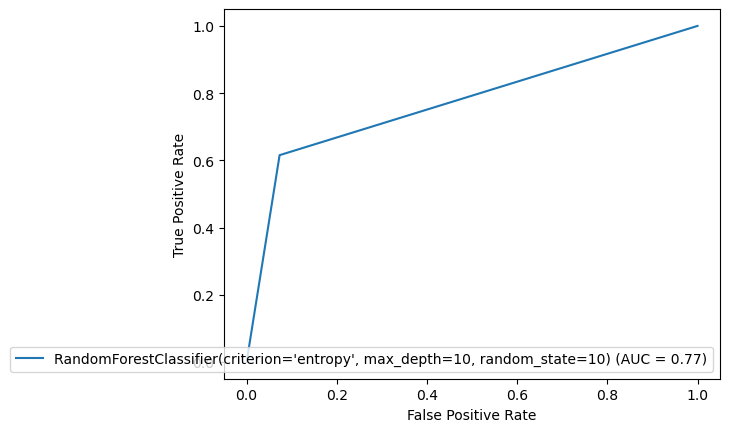

In [210]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [211]:
#saving the model
import joblib
joblib.dump(Final_model,"TitanicSurvivalProject.pkl")

['TitanicSurvivalProject.pkl']

In [212]:
model=joblib.load("TitanicSurvivalProject.pkl")
prediction=model.predict(x_test)

In [213]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
263,1,1
264,0,0
265,0,0
266,1,0
